Calculating the normalized eigenfunctions and eigenvalues of the linear PDE using a direct solution method. Forward- and backward-differencing for the boundary conditions, center differencing for interior points.

Center difference scheme for $\phi''(x)$
$$
	\phi''(x) = \left[ \phi(x + \Delta x) - 2 \phi(x) + \phi(x - \Delta x) \right] / \Delta x^2
$$

Thus the derivative matrix is as follows:
$$
	A = \frac{1}{\Delta x^2}\left[ \begin{array}{rrrrrr}
		-2 & 1 & 0 & 0 & \cdots & 0 \\
		1 & -2 & 1 & 0 & \cdots & \\
		0 & 1 & -2 & 1 & \cdots & \\
		& & \vdots & & & \\
		& \cdots & & 1 & -2 & 1 \\
		0 & \cdots & & 0 & -1 & -2
	\end{array} \right]
$$

But that doesn't account for the known boundary conditions.

For $x = -L$, there are no past values so use forward difference scheme for $\psi'(x)$:
$$
	\psi'(x) = \left[ -3\psi(x) + 4\psi(x + \Delta x) - \psi(x + 2\Delta x) \right] / 2 \Delta x
$$
Then
$$
	x = -L: \; \frac{-3\psi_0 + 4\psi_1 - \psi_2}{2 \Delta x} - \sqrt{L^2 - \epsilon_n} \psi_0 = 0 \\
	-3\psi_0 + 4\psi_1 - \psi_2 - 2\Delta x \sqrt{L^2 - \epsilon_n} \psi_0 = \psi_0(-3 - 2\Delta x \sqrt{L^2 - \epsilon_n}) + 4\psi_1 - \psi_2 \\
	\psi_0 = \frac{4\psi_1 - \psi_2}{3 + 2\Delta x \sqrt{L^2 - \epsilon_n}}
$$
We can assume that $\Delta x$ will be sufficiently small relative to $3$, thus the denomenator can be approximated to $3$ and we reach:
$$
	\psi_0 = \frac{4\psi_1 - \psi_2}{3}
$$
for $x = -L$.

For the other case $x = L$, there are no future values so use backwards differense scheme.
$$
	\psi^\prime(x) = \left[ 3\psi(x) - 4\psi(x - \Delta x) + \psi(x - 2\Delta x) \right] / 2 \Delta x
$$
Using the same solving method,
$$
	x = L: \; \frac{3\psi_0 - 4\psi_{-1} + \psi_{-2}}{2 \Delta x} + \sqrt{L^2 - \epsilon_n} \psi_0 = 0 \\
	3\psi_0 - 4\psi_{-1} + \psi_{-2} + 2 \Delta x \sqrt{L^2 - \epsilon_n} \psi_0 = 0 \\
	\psi_0 = \frac{4\psi_{-1} - \psi_{-2}}{3 + 2 \Delta x \sqrt{L^2 - \epsilon_n}} \approx \frac{4\psi_{-1} - \psi_{-2}}{3}
$$

Using the boundary value conditions,
$$
	x = -L: \; \psi^\prime - \frac{4\psi_1 - \psi_2}{3} \sqrt{L^2 - \epsilon_n} = 0 \\
	x = L: \; \psi^\prime + \frac{4\psi_1 - \psi_2}{3} \sqrt{L^2 - \epsilon_n} = 0
$$

Let $\alpha = \sqrt{L^2 - \epsilon_n}$ and plug these values back into our matrix accordingly,
$$
	A = \frac{1}{\Delta x^2} \left[ \begin{array}{rrrrrr}
		4/3 \Delta x^2 \alpha & -1/3 \Delta x^2 \alpha & 0 & 0 & \cdots & 0 \\
		1 & -2 & 1 & 0 & \cdots & \\
		0 & 1 & -2 & 1 & \cdots & \\
		& & \vdots & & & \\
		& \cdots & & 1 & -2 & 1 \\
		0 & \cdots & & 0 & 1/3 \Delta x^2 \alpha  & -4/3 \Delta x^2 \alpha
	\end{array} \right]
$$

Returning to the initial problem, $A\phi - [Kx^2 - \epsilon]\phi = 0$ can be rearranged into $(A + Kx^2)\phi = \epsilon\phi$. Let $X$ represent a transformation which is $Kx^2$ on the diagonal. Then $D = A + X$ is reduced into one transformation.

With this matrix, we begin to be able to solve the intended
$$
Dx = \epsilon \phi
$$
eigen problem.

In [1]:
# Imports 
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

In [2]:
# Defined parameters
num_eigenvalues= 5

L = 4
K = 1
dx = 0.1

N = int((L - -L)/dx)
xspan = np.linspace(-4, 4, N)

In [6]:
# Direct solve

# Construct diagonals
main_diagonal = 2*np.ones(N) / dx**2
upper_diagonal = -np.ones(N - 1) / dx**2
lower_diagonal = -np.ones(N - 1) / dx**2

# Found boundary values
main_diagonal[0] *= 4/3
main_diagonal[-1] *= 4/3

upper_diagonal[0] *= -1/3
lower_diagonal[-1] *= -1/3

# Add X transformation to main diagonal
X = K * xspan**2
main_diagonal += X

# Construct derivative matrix 
D = diags([lower_diagonal, main_diagonal, upper_diagonal], [-1, 0, 1])

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigs(D, k=num_eigenvalues, which='SM')
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

print(eigenvalues)

[1.01201826 3.03480551 5.05546348 7.07674587 9.11062062]


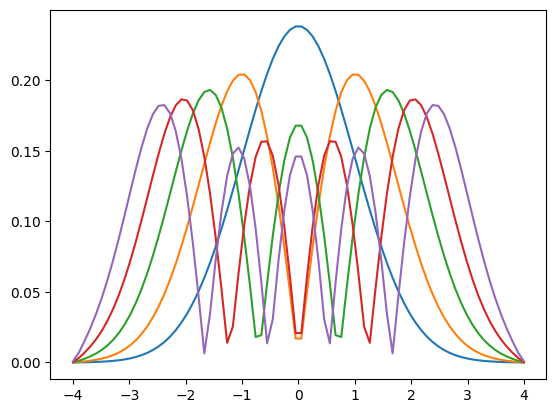

In [5]:
for i in range(num_eigenvalues):
    plt.plot(xspan, np.abs(eigenvectors[:, i]), label=f'n={i}')
plt.show()